In [2]:
from splinter import Browser
from bs4 import BeautifulSoup as soup
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords

In [3]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\zachb\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\zachb\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [4]:
def remove_stopwords(list):
    '''Function to remove unimportant words from list of words on front page'''
    
    # Get a list of English stopwords
    stop_words = set(stopwords.words('english'))

    # Filter out the stopwords
    filtered_words = [word for word in list if word.lower() not in stop_words]

    return filtered_words

In [5]:
browser = Browser('chrome')

In [6]:
# apnews website
url = 'https://apnews.com/'
browser.visit(url)

In [7]:
html = browser.html
ap_soup = soup(html, 'html.parser')

In [8]:
ap_article_links = ap_soup.find_all(class_ = 'Link')

In [9]:
# article text found in these spots: 'PagePromoContentIcons-text', 'Link'.text

In [10]:
# Retrieve links on front page
def get_links():
    '''Retrieves links from Associated Press webpage'''


    html = browser.html
    ap_soup = soup(html, 'html.parser')
    ap_article_links = ap_soup.find_all(class_ = 'Link')
    link_urls = []
    for link in ap_article_links:
        try:
            link_urls.append(link['href'])
        except:
            pass

    unique_links = []
    for link in link_urls:
        if link not in unique_links:
            unique_links.append(link)

    return unique_links

In [11]:
def ap_text():
    '''Retrieves text from Associated Press webpage'''


    html = browser.html
    ap_soup = soup(html, 'html.parser')
    # article links text contain header of news article, sometimes image header
    ap_article_links = ap_soup.find_all(class_ = 'Link')
    # text for the breaking news bar underneath website nav
    promo_text = ap_soup.findAll(class_ = ' PagePromoContentIcons-text')
    link_text = []

    # take text from articles
    for link in ap_article_links:
        try:
            text = link.text.strip()
            if text:
                link_text.append(text)
        except:
            pass
    # take text from breaking news
    for link in promo_text:
        try:
            text = link.text.strip()
            if text:
                link_text.append(text)
        except:
            pass


    return link_text

In [12]:
# article_urls = []
# article_text = []
# for article in ap_article_links:
#     try:
#         article_urls.append(article['href'])
#         text = article.text.strip()
#         if text:
#             article_text.append(text)
#     except:
#         pass

In [13]:
unique_urls = get_links()
link_text = ap_text()

In [14]:
# link_text

In [15]:
words_list = []
for item in link_text:
    words = (item.split(' '))
    for word in words:
        words_list.append(word)
words_list

['Russia',
 '-',
 'Ukraine',
 'war',
 '‘Nones’',
 'on',
 'the',
 'rise',
 'Jon',
 'Fosse',
 'wins',
 'Nobel',
 'prize',
 'Syria',
 'drone',
 'strikes',
 'Simone',
 'Biles',
 'at',
 'Worlds',
 'Most',
 '2024',
 'GOP',
 'presidential',
 'candidates',
 'urge',
 'Republicans',
 'to',
 'stop',
 'the',
 'chaos',
 'after',
 'McCarthy’s',
 'ouster',
 'Kevin',
 'McCarthy’s',
 'ouster',
 'as',
 'House',
 'speaker',
 'could',
 'cost',
 'the',
 'GOP',
 'its',
 'best',
 'fundraiser',
 'heading',
 'into',
 '2024',
 'Kevin',
 'McCarthy',
 'was',
 'an',
 'early',
 'architect',
 'of',
 'the',
 'Republican',
 'majority',
 'that',
 'became',
 'his',
 'downfall',
 'Thousands',
 'of',
 'US',
 'workers',
 'are',
 'on',
 'strike',
 'today.',
 'Here’s',
 'a',
 'rundown',
 'of',
 'major',
 'work',
 'stoppages',
 'happening',
 'now',
 'Lawyers',
 'of',
 'alleged',
 'Andrew',
 'Tate’s',
 'victims',
 'say',
 'their',
 'clients',
 'are',
 'being',
 'harassed',
 'and',
 'intimidated',
 'Meta',
 'and',
 'X',
 'quest

In [16]:
word_count = {}
for word in words_list:
    key = word
    if key in  word_count:
        word_count[key] += 1
    else:
        word_count[key] = 1

word_count = {k: v for k, v in sorted(word_count.items(), key=lambda item: item[1], reverse=True)}
print(word_count)

{'in': 38, 'to': 35, 'the': 30, 'of': 28, 'and': 26, 'a': 22, 'for': 22, 'on': 13, 'are': 13, 'is': 9, 'with': 9, 'at': 8, 'as': 8, 'says': 8, 'after': 6, 'by': 6, 'win': 6, 'No.': 6, 'its': 5, 'US': 5, 'their': 5, 'against': 5, 'from': 5, '2024': 4, 'say': 4, 'who': 4, 'they': 4, 'The': 4, 'be': 4, 'it': 4, 'Nobel': 3, 'Republicans': 3, 'ouster': 3, 'House': 3, 'that': 3, 'over': 3, 'federal': 3, 'race': 3, 'gold': 3, 'first': 3, 'has': 3, 'World': 3, 'Cup': 3, 'visit': 3, 'new': 3, 'if': 3, 'host': 3, 'New': 3, 'A': 3, 'Texas': 3, 'look': 3, 'season': 3, 'unbeaten': 3, 'Ukraine': 2, 'war': 2, '‘Nones’': 2, 'rise': 2, 'Jon': 2, 'prize': 2, 'Syria': 2, 'drone': 2, 'GOP': 2, 'presidential': 2, 'McCarthy’s': 2, 'Kevin': 2, 'could': 2, 'cost': 2, 'into': 2, 'McCarthy': 2, 'was': 2, 'an': 2, 'became': 2, 'his': 2, 'strike': 2, 'victims': 2, 'being': 2, 'X': 2, 'political': 2, 'Trump': 2, 'seek': 2, 'election': 2, 'will': 2, 'guilty': 2, '10': 2, 'shooting': 2, 'life': 2, 'plane': 2, 'lates

Text(0.5, 1.0, 'Most Used Words on Front Page of AP Website')

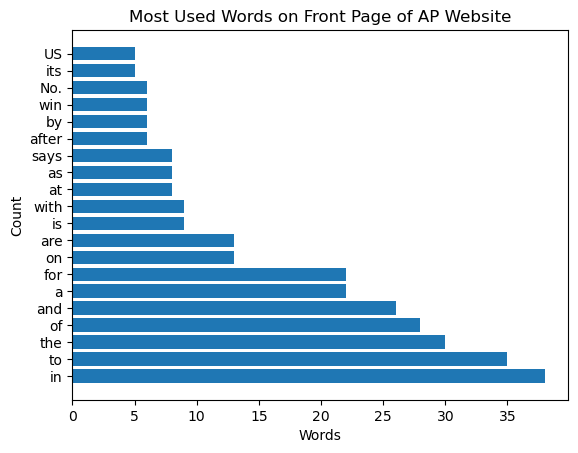

In [17]:
n = 20
top_words = list(word_count.keys())[:n]
top_counts = [word_count[word] for word in top_words]

plt.barh(top_words, top_counts)
plt.xlabel('Words')
plt.ylabel('Count')
plt.title('Most Used Words on Front Page of AP Website')


In [18]:
cleaned_list = remove_stopwords(words_list)

cleaned_count = {}
for word in cleaned_list:
    key = word
    if key in  cleaned_count:
        cleaned_count[key] += 1
    else:
        cleaned_count[key] = 1

cleaned_count = {k: v for k, v in sorted(cleaned_count.items(), key=lambda item: item[1], reverse=True)}
print(cleaned_count)

{'says': 8, 'win': 6, 'No.': 6, 'US': 5, '2024': 4, 'say': 4, 'Nobel': 3, 'Republicans': 3, 'ouster': 3, 'House': 3, 'federal': 3, 'race': 3, 'gold': 3, 'first': 3, 'World': 3, 'Cup': 3, 'visit': 3, 'new': 3, 'host': 3, 'New': 3, 'Texas': 3, 'look': 3, 'season': 3, 'unbeaten': 3, 'Ukraine': 2, 'war': 2, '‘Nones’': 2, 'rise': 2, 'Jon': 2, 'prize': 2, 'Syria': 2, 'drone': 2, 'GOP': 2, 'presidential': 2, 'McCarthy’s': 2, 'Kevin': 2, 'could': 2, 'cost': 2, 'McCarthy': 2, 'became': 2, 'strike': 2, 'victims': 2, 'X': 2, 'political': 2, 'Trump': 2, 'seek': 2, 'election': 2, 'guilty': 2, '10': 2, 'shooting': 2, 'life': 2, 'plane': 2, 'latest': 2, 'school': 2, 'seeking': 2, 'arrested': 2, 'returns': 2, 'get': 2, 'high': 2, 'America’s': 2, 'much': 2, 'NFL': 2, 'games': 2, 'join': 2, 'First': 2, 'lead': 2, '3': 2, 'American': 2, 'Biden': 2, 'border': 2, 'original': 2, 'play': 2, '—': 2, 'Series': 2, 'he’s': 2, 'car': 2, '2': 2, 'back': 2, 'helped': 2, 'scientists': 2, 'call': 2, 'rates': 2, 'Frid

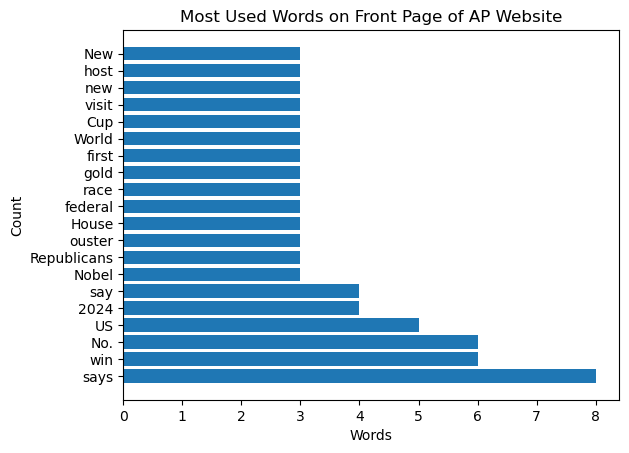

In [20]:
n = 20
clean_top_words = list(cleaned_count.keys())[:n]
clean_top_counts = [cleaned_count[word] for word in clean_top_words]

plt.barh(clean_top_words, clean_top_counts)
plt.xlabel('Words')
plt.ylabel('Count')
plt.title('Most Used Words on Front Page of AP Website')

plt.show()

In [60]:
# topics_links = ap_soup.find_all(class_ = 'AnClick-MainNav')

# topics_urls = []

# for topic in topics_links:
#     topics_urls.append(topic['href'])

In [18]:
# topics_links = ap_soup.find_all(class_ = 'AnClick-MainNav')

# topics_links[1]

<a class="AnClick-MainNav" href="https://apnews.com/world-news">World</a>

In [100]:
browser.quit()